<a href="https://colab.research.google.com/github/talitasilvad/challenge-alura-telecomx/blob/main/AluraTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
telecomx_df = pd.DataFrame(data)
telecomx_df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
telecomx_df = pd.json_normalize(data, sep='_')
telecomx_df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
telecomx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [5]:
for coluna in telecomx_df.columns:
    if telecomx_df[coluna].nunique() < 50:
        print(f"--- {coluna} ({telecomx_df[coluna].dtype}) ---")
        print(telecomx_df[coluna].unique())
        print("-" * 30)

--- Churn (object) ---
['No' 'Yes' '']
------------------------------
--- customer_gender (object) ---
['Female' 'Male']
------------------------------
--- customer_SeniorCitizen (int64) ---
[0 1]
------------------------------
--- customer_Partner (object) ---
['Yes' 'No']
------------------------------
--- customer_Dependents (object) ---
['Yes' 'No']
------------------------------
--- phone_PhoneService (object) ---
['Yes' 'No']
------------------------------
--- phone_MultipleLines (object) ---
['No' 'Yes' 'No phone service']
------------------------------
--- internet_InternetService (object) ---
['DSL' 'Fiber optic' 'No']
------------------------------
--- internet_OnlineSecurity (object) ---
['No' 'Yes' 'No internet service']
------------------------------
--- internet_OnlineBackup (object) ---
['Yes' 'No' 'No internet service']
------------------------------
--- internet_DeviceProtection (object) ---
['No' 'Yes' 'No internet service']
------------------------------
--- internet

In [6]:
print('Numero de duplicados', telecomx_df.duplicated().sum())

Numero de duplicados 0


In [7]:
print('Numero de nulos \n', telecomx_df.isnull().sum())

Numero de nulos 
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [8]:
telecomx_df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [9]:
telecomx_df['account_Charges_Total'] = pd.to_numeric(telecomx_df['account_Charges_Total'], errors='coerce')


In [10]:
telecomx_df = telecomx_df[telecomx_df['Churn'].str.strip() != '']
print("Número de filas depois de eliminar as vazias em 'Churn':", len(telecomx_df))

Número de filas depois de eliminar as vazias em 'Churn': 7043


In [11]:
telecomx_df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [12]:
print('Numero de nulos \n', telecomx_df.isnull().sum())

Numero de nulos 
 customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [13]:
telecomx_df = telecomx_df.dropna(subset=['account_Charges_Total'])

In [14]:
print('Numero de nulos \n', telecomx_df.isnull().sum())

Numero de nulos 
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [15]:
telecomx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [16]:
telecomx_df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [17]:
#criando coluna (contas diarias)
telecomx_df['account_Charges_Daily'] = (telecomx_df['account_Charges_Monthly'] / 30).round(2)

In [18]:
#padronizando valores textuais "Sim" e "Não" em valores binários 1 e 0
telecomx_df = telecomx_df.replace({'Yes': 1, 'No': 0})
mapeamento = {
    'Yes':1,
    'No':0,
    'No internet service':0,
    'No phone service':0
}

telecomx_df = telecomx_df.replace(mapeamento)
telecomx_df = telecomx_df.infer_objects(copy=False)
telecomx_df

/tmp/ipython-input-2856305588.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecomx_df = telecomx_df.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2856305588.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecomx_df = telecomx_df.replace(mapeamento)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [19]:
telecomx_df['internet_InternetService'].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [20]:
telecomx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   int64  
 5   customer_Dependents        7032 non-null   int64  
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   int64  
 8   phone_MultipleLines        7032 non-null   int64  
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   int64  
 11  internet_OnlineBackup      7032 non-null   int64  
 12  internet_DeviceProtection  7032 non-null   int64  
 13  internet_TechSupport       7032 non-null   int64  
 1

**📊 Carga e Análise (L - Load & Analysis)**

In [21]:
contagem_churn = telecomx_df['Churn'].value_counts().reset_index(name='Total')
print(contagem_churn)

proporcao_churn = telecomx_df['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Proporção (%)')
print(f"\n{proporcao_churn}")

   Churn  Total
0      0   5163
1      1   1869

   Churn  Proporção (%)
0      0      73.421502
1      1      26.578498


In [22]:
cores_projeto = {
    'Cancelaram': "#E12626",
    'Permaneceram': "#088FE0",

    'Não': '#E12626',
    'Sim': '#088FE0',

    'DSL': "#0A919D",
    'Fiber optic': "#9b59b6",
    'No': "#95a5a6",

    'Female': '#9b59b6',
    'Male': '#0A919D'
}

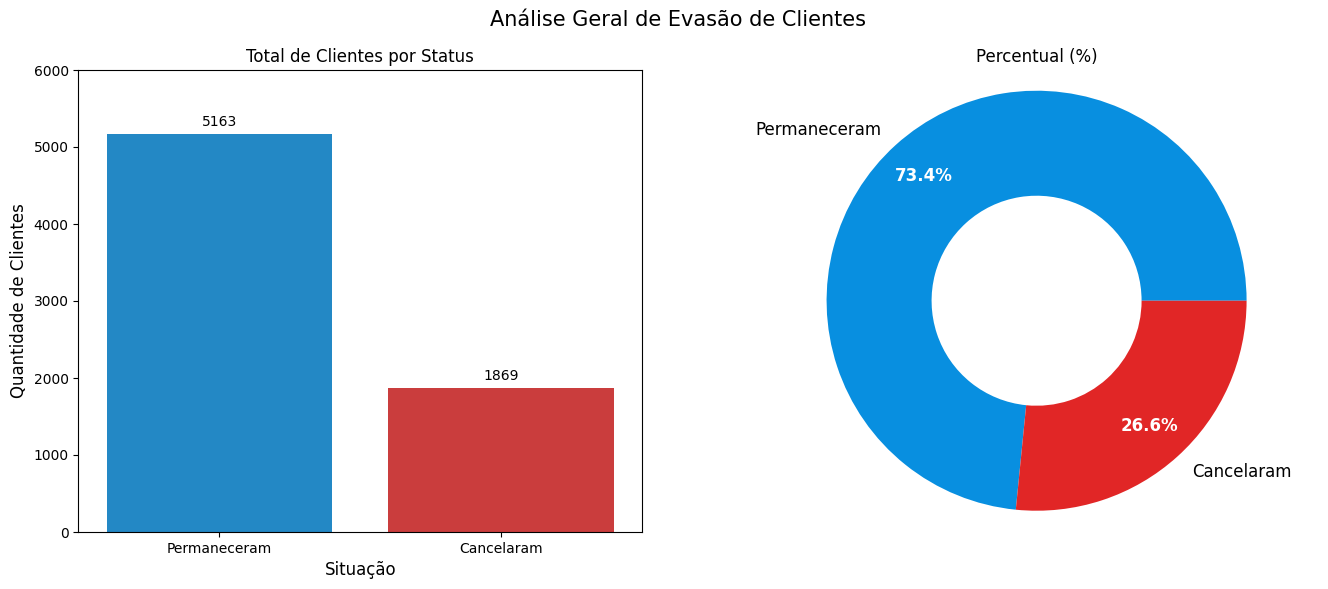

In [23]:
#Análise e gráficos gerais de cancelamento de clientes
contagem_churn['Churn'] = contagem_churn['Churn'].replace({0:'Permaneceram', 1:'Cancelaram'})
proporcao_churn['Churn'] = proporcao_churn['Churn'].replace({0:'Permaneceram', 1:'Cancelaram'})

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Análise Geral de Evasão de Clientes', fontsize=15)

sns.barplot(ax=axs[0],
            data=contagem_churn,
            x='Churn',
            y='Total',
            palette=cores_projeto,
            hue='Churn',
            legend=False)
axs[0].set_title('Total de Clientes por Status')
axs[0].set_xlabel('Situação')
axs[0].set_ylabel('Quantidade de Clientes')
axs[0].set_ylim(0,6000)

for p in axs[0].patches:
  height = p.get_height()
  if height > 0:
    axs[0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0,9),
                    textcoords='offset points')

wedges, texts, autotexts = axs[1].pie(
    proporcao_churn['Proporção (%)'],
    labels=['Permaneceram', 'Cancelaram'],
    autopct='%1.1f%%',
    colors=['#088FE0', '#E12626'],
    textprops={"fontsize": 12},
    wedgeprops=dict(width=0.5),
    pctdistance=0.80)


axs[1].set_title('Percentual (%)')
axs[1].axis('equal')
plt.setp(autotexts, weight="bold", color="white")


for ax in axs:
    ax.title.set_fontsize(12)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
plt.show()

**Análise Descritiva**

In [24]:
telecomx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   int64  
 5   customer_Dependents        7032 non-null   int64  
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   int64  
 8   phone_MultipleLines        7032 non-null   int64  
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   int64  
 11  internet_OnlineBackup      7032 non-null   int64  
 12  internet_DeviceProtection  7032 non-null   int64  
 13  internet_TechSupport       7032 non-null   int64  
 1

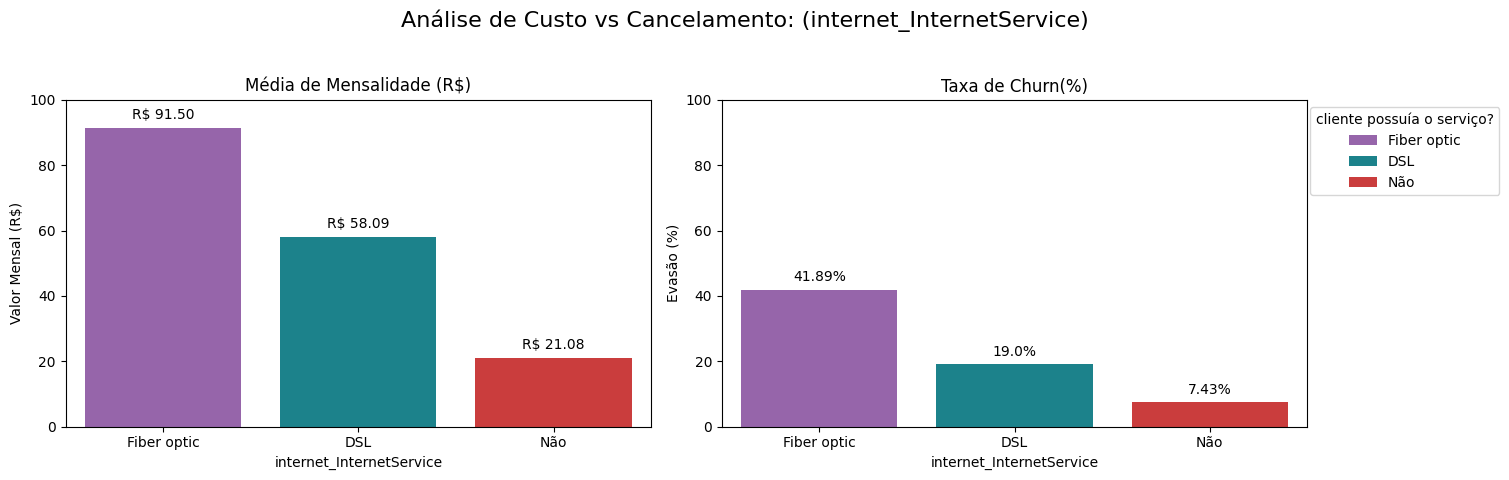

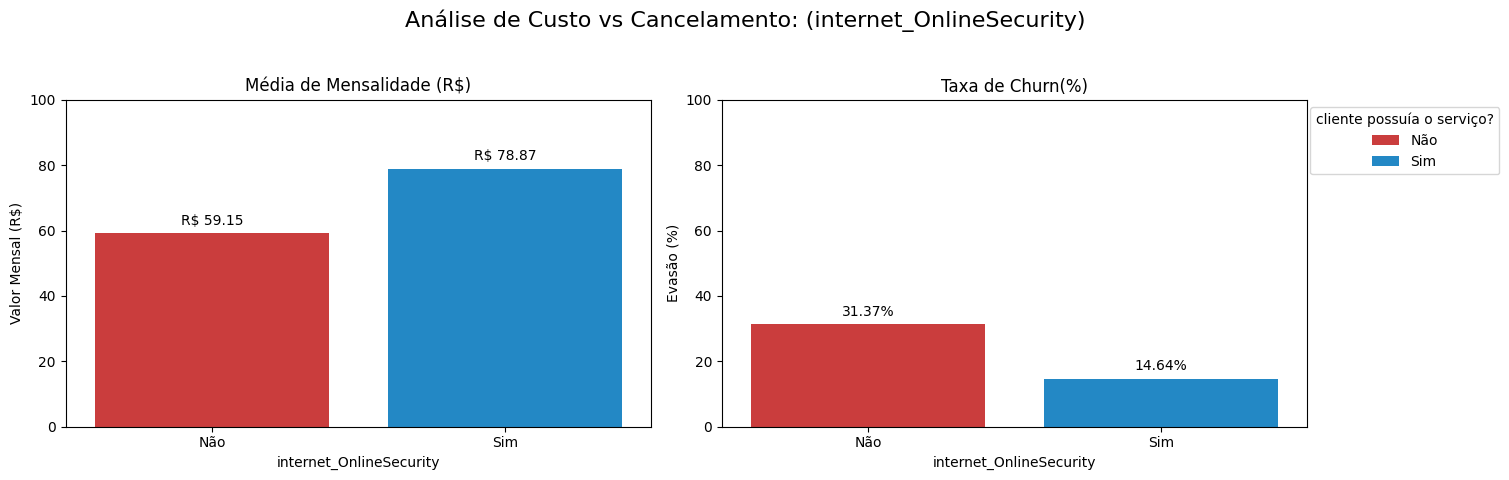

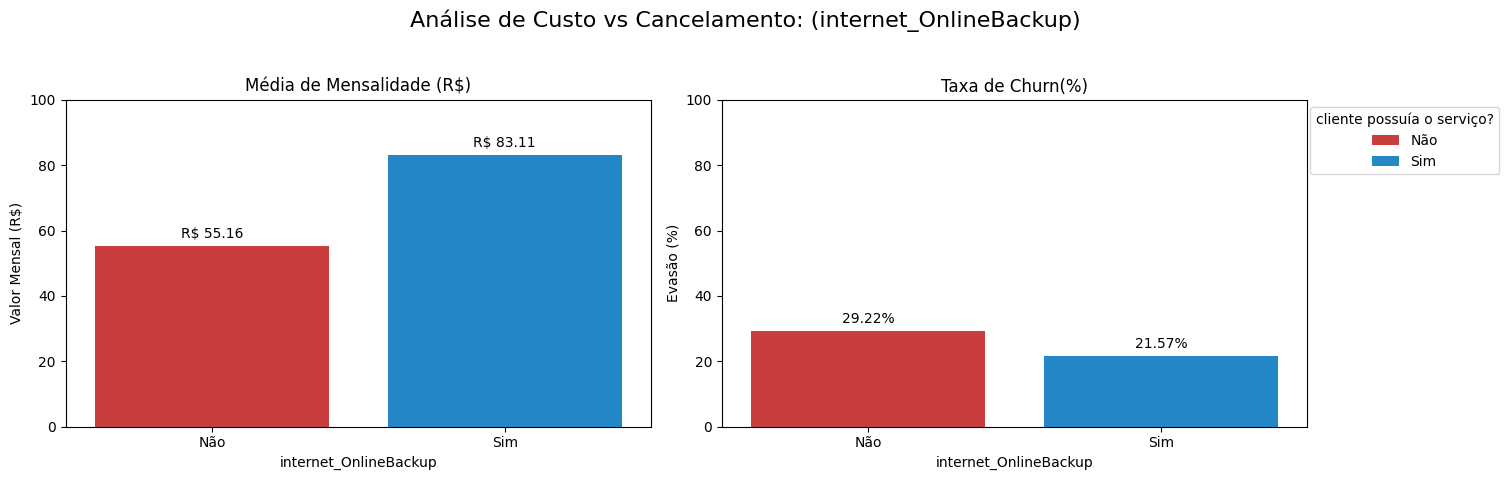

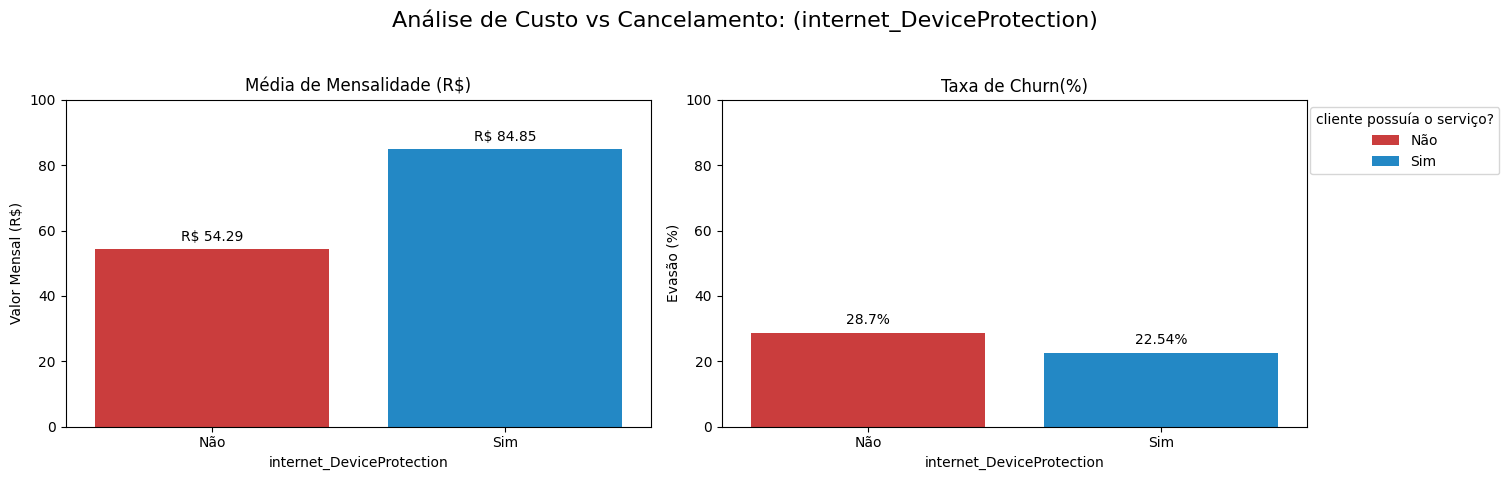

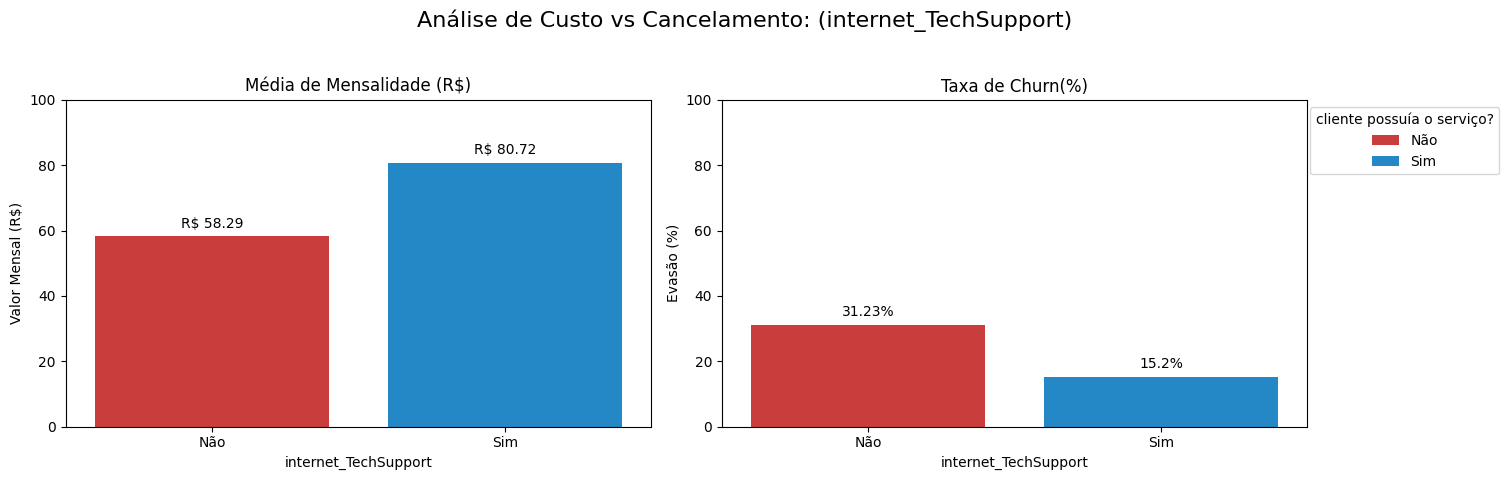

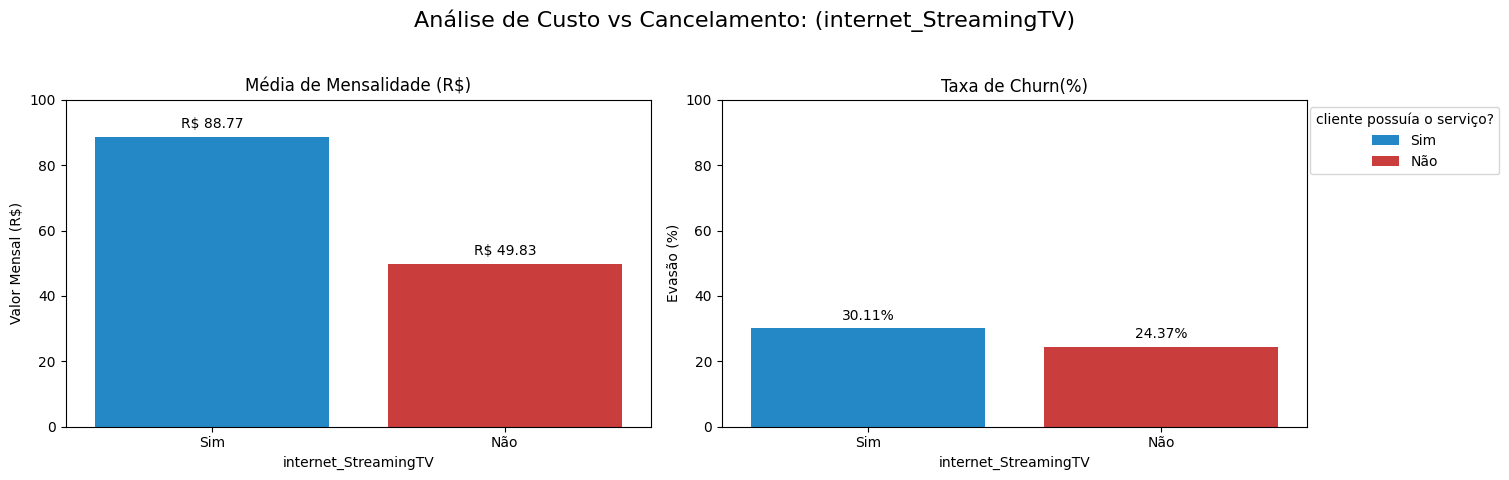

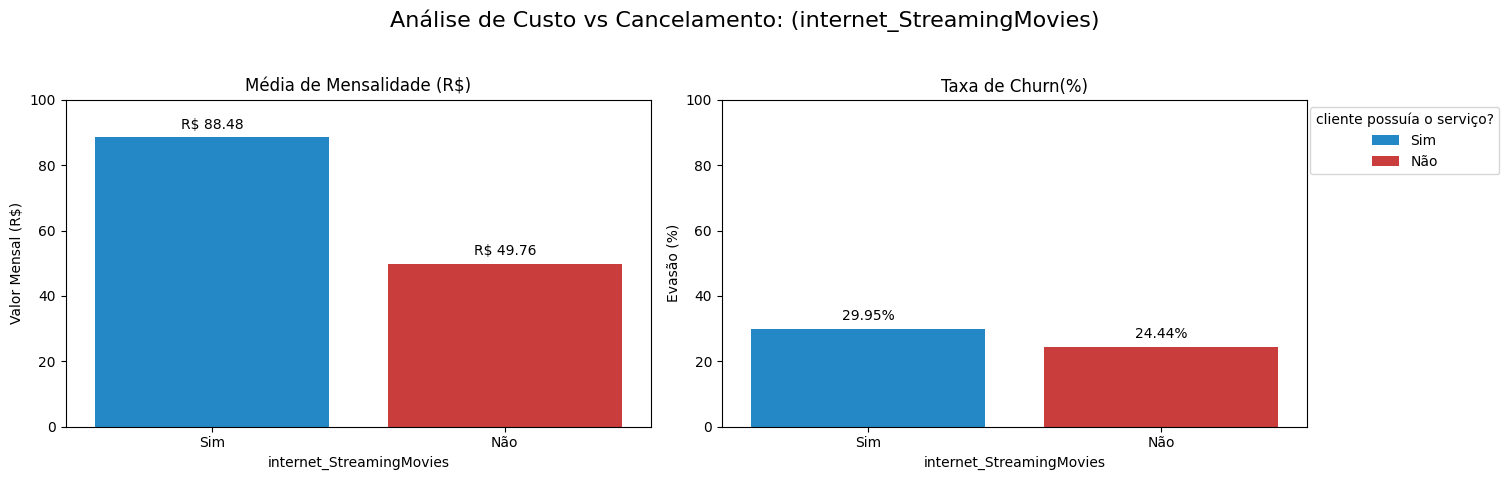

In [25]:
#Análise de serviço, preço, e cancelamento(Churn)
coluna_adicionais = [
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

for col in coluna_adicionais:
  analise_agrupado = telecomx_df.groupby(col).agg({
      'account_Charges_Monthly':'mean',
      'Churn':'mean'
  }).reset_index()

  analise_agrupado['Churn'] = (analise_agrupado['Churn'] * 100).round(2)
  analise_agrupado['account_Charges_Monthly'] = analise_agrupado['account_Charges_Monthly'].round(2)

  analise_agrupado = analise_agrupado.sort_values(by='Churn', ascending=False)
  analise_agrupado[col] = analise_agrupado[col].replace({0:'Não', 1:'Sim'})

  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(f'Análise de Custo vs Cancelamento: ({col})', fontsize=16)

  sns.barplot(ax=axs[0],
              data=analise_agrupado,
              x=col,
              y='account_Charges_Monthly',
              palette=cores_projeto,
              hue=col,
              legend=False)
  axs[0].set_title('Média de Mensalidade (R$)')
  axs[0].set_ylabel('Valor Mensal (R$)')
  axs[0].set_ylim(0,100)

  for p in axs[0].patches:
    axs[0].annotate(f'R$ {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0,9),
                    textcoords='offset points')

  sns.barplot(ax=axs[1],
              data=analise_agrupado,
              x=col,
              y='Churn',
              palette=cores_projeto,
              hue=col,
              legend=True)
  axs[1].set_title('Taxa de Churn(%)')
  axs[1].legend(title='cliente possuía o serviço?', loc='upper right', bbox_to_anchor=(1.34, 1))
  axs[1].set_ylabel('Evasão (%)')
  axs[1].set_ylim(0,100)

  for p in axs[1].patches:
    height = p.get_height()
    if height > 0:
      axs[1].annotate(f'{height}%', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0,9),
                      textcoords='offset points')
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()
  print('\n')


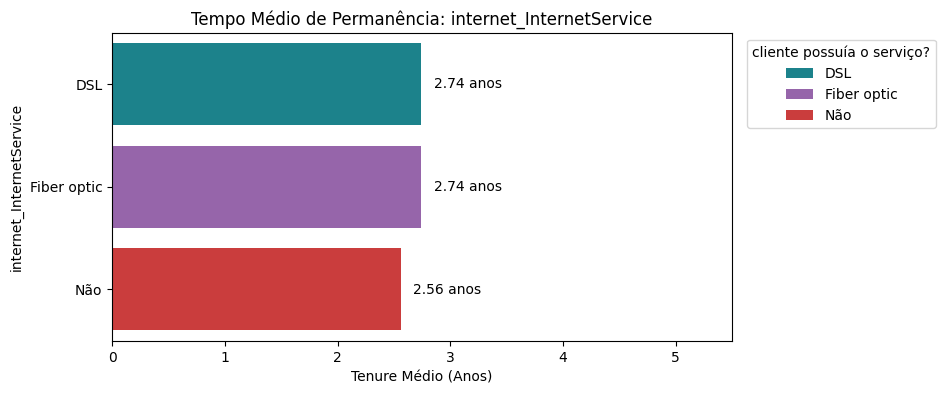

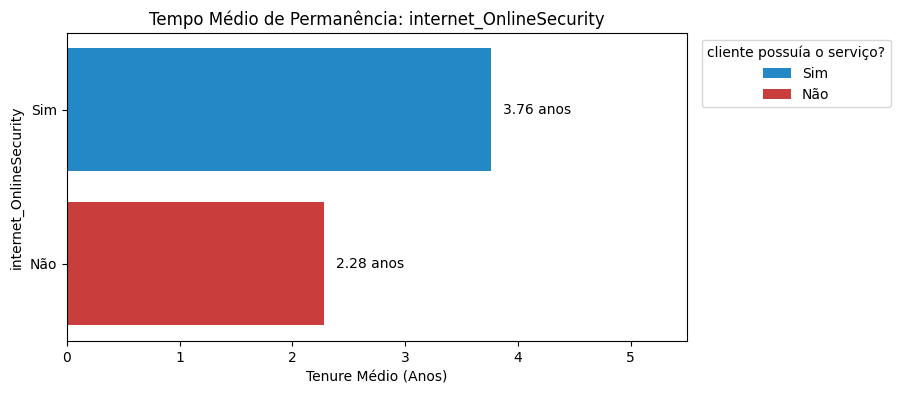

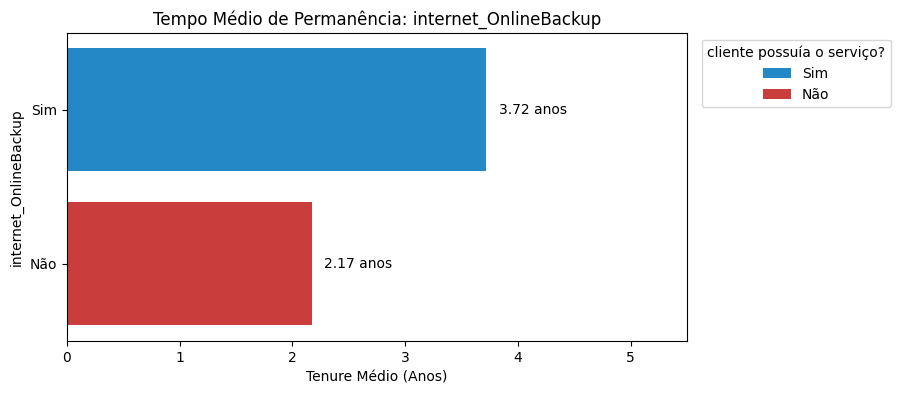

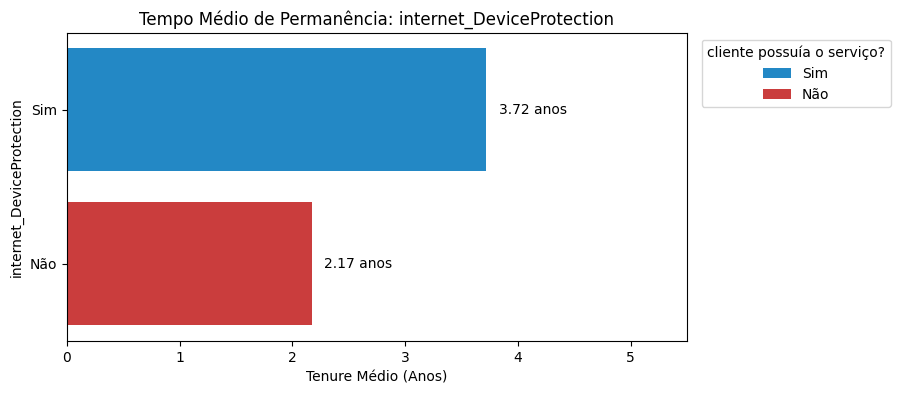

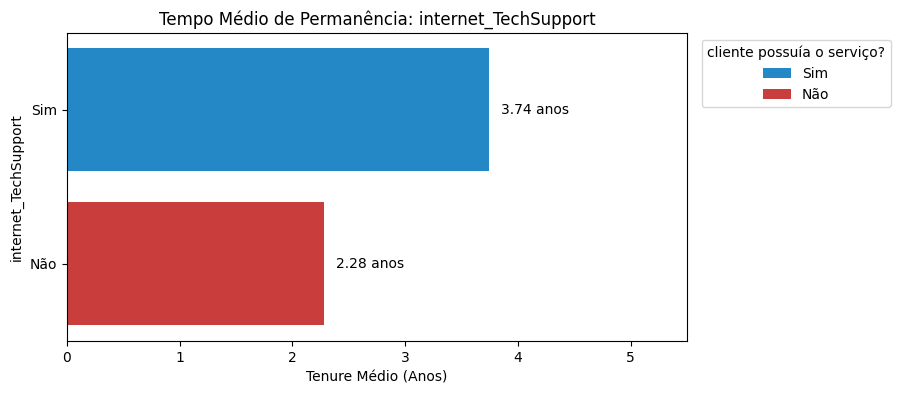

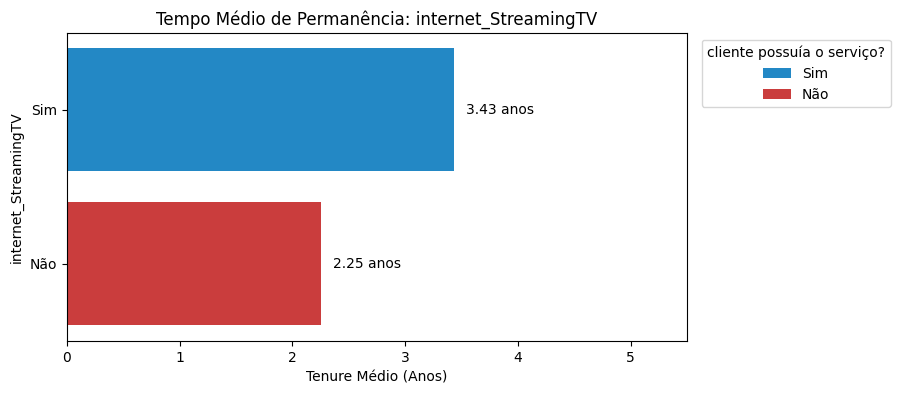

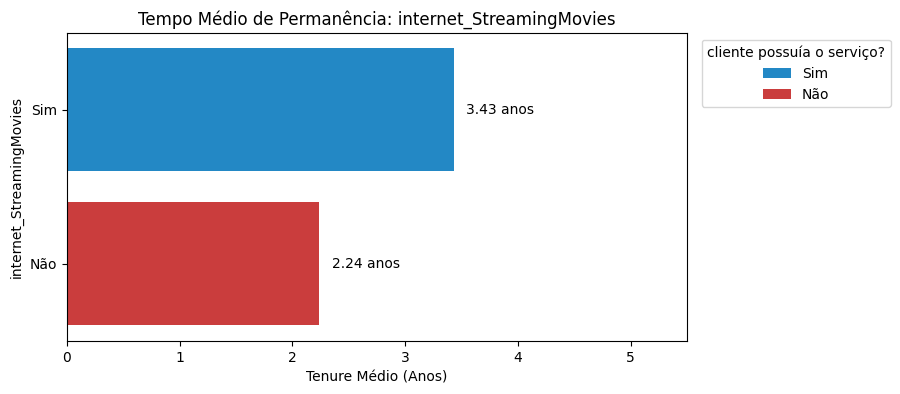

In [26]:
#Quantidade de tempo (meses -> anos) que o cliente fica na empresa por conta dos serviços adicionais
coluna_adicionais_tempo = [
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in coluna_adicionais_tempo:
  analise_tempo = telecomx_df.groupby(col)['customer_tenure'].mean().reset_index()
  analise_tempo['customer_tenure'] = (analise_tempo['customer_tenure'] / 12).round(2)
  analise_tempo.columns = [col, 'Tenure Médio (Anos)']
  analise_tempo[col] = analise_tempo[col].replace({0:'Não', 1:'Sim'})

  analise_tempo = analise_tempo.sort_values(by='Tenure Médio (Anos)', ascending=False)

  plt.figure(figsize=(8,4))

  grafico = sns.barplot(data=analise_tempo,
                        x='Tenure Médio (Anos)',
                        y=col,
                        hue=col,
                        palette=cores_projeto,
                        legend=True)

  for p in grafico.patches:
    width = p.get_width()
    if width > 0:
      grafico.annotate(f'{width} anos',
                        (width, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(9,0),
                        textcoords='offset points')

  plt.title(f'Tempo Médio de Permanência: {col}')
  plt.legend(title='cliente possuía o serviço?', loc='upper right', bbox_to_anchor=(1.34, 1))
  plt.xlim(0, 5.5)
  plt.show()
  print('\n')

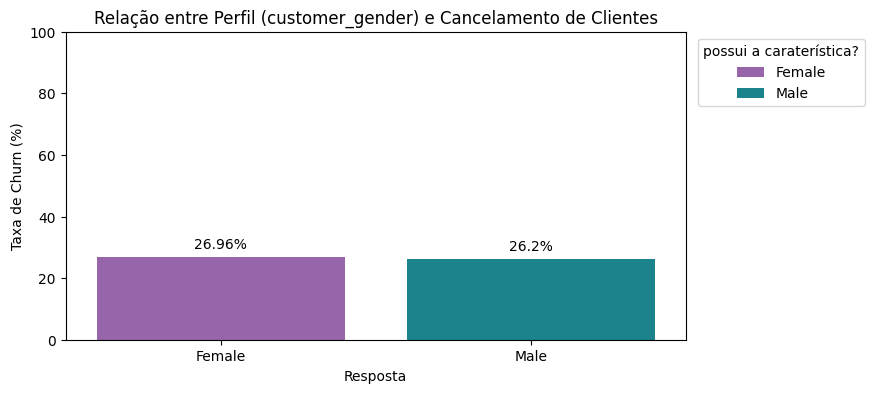

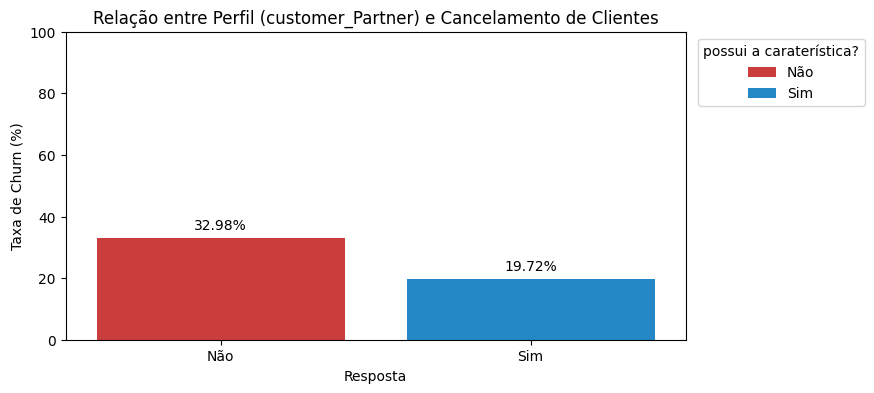

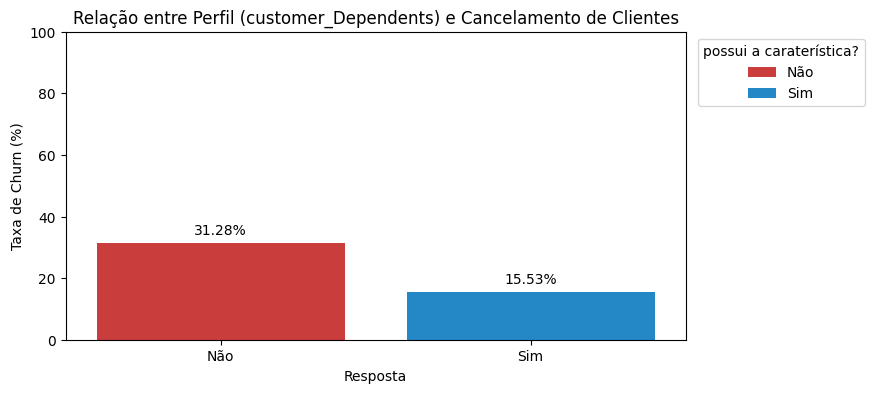

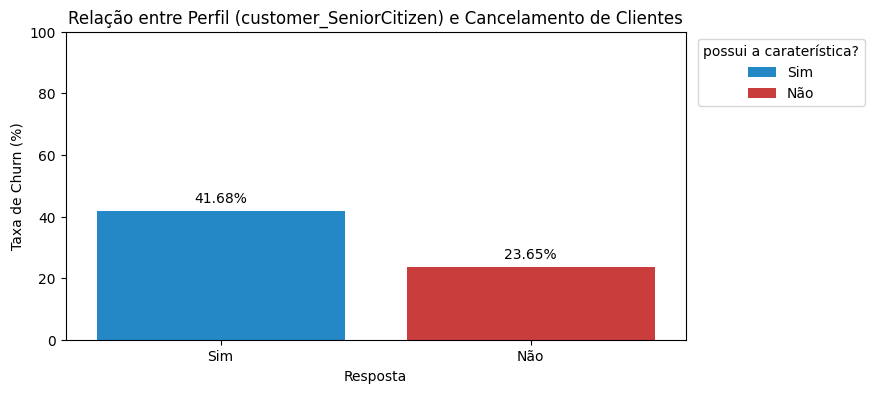

In [27]:
#Perfil do cliente para verificar a Taxa de Churn
colunas_perfil = [
    'customer_gender',
    'customer_Partner',
    'customer_Dependents',
    'customer_SeniorCitizen',
]
for col in colunas_perfil:
  analise_perfil = (telecomx_df.groupby(col)['Churn'].mean() * 100).round(2).reset_index()
  analise_perfil.columns = [col, 'Taxa de Churn(%)']
  analise_perfil[col] = analise_perfil[col].replace({0:'Não', 1:'Sim'})

  analise_perfil = analise_perfil.sort_values(by='Taxa de Churn(%)', ascending=False)

  plt.figure(figsize=(8,4))

  grafico = sns.barplot(data=analise_perfil,
                        x=col,
                        y='Taxa de Churn(%)',
                        hue=col,
                        palette=cores_projeto,
                        legend=True)

  for p in grafico.patches:
    height = p.get_height()
    if height > 0:
      grafico.annotate(f'{height}%',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0,9),
                      textcoords = 'offset points')

  plt.title(f'Relação entre Perfil ({col}) e Cancelamento de Clientes')
  plt.legend(title='possui a caraterística?', loc='upper right', bbox_to_anchor=(1.30, 1))
  plt.ylabel('Taxa de Churn (%)')
  plt.xlabel('Resposta')
  plt.ylim(0,100)

  plt.show()
  print('\n')



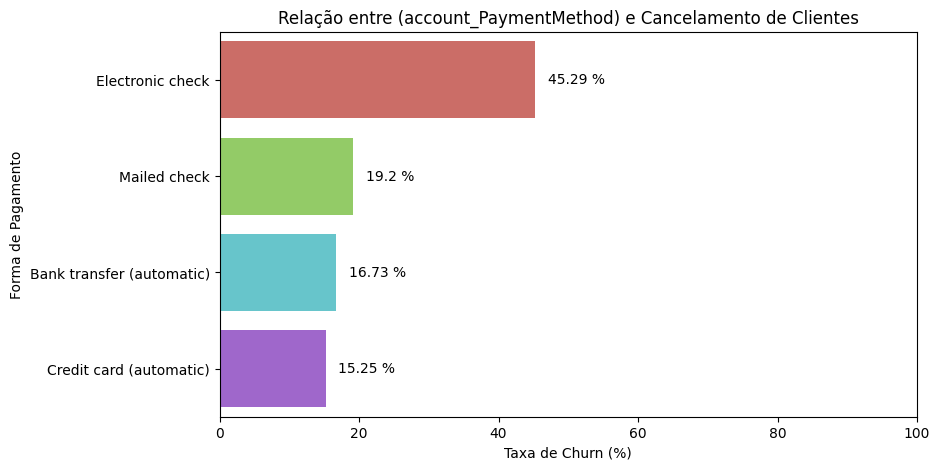

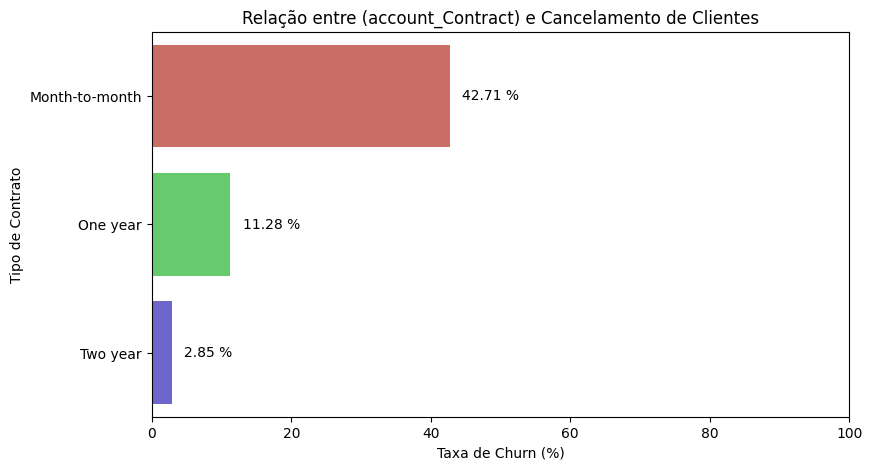

In [35]:
#A forma de pagamento e contrato influência a taxa de Churn?
nomes_eixos = {
    'account_PaymentMethod':'Forma de Pagamento',
    'account_Contract':'Tipo de Contrato'
}
colunas_pagamento_contrato = [
    'account_PaymentMethod',
    'account_Contract'
]
for col in colunas_pagamento_contrato:
  analise_pag_contr = (telecomx_df.groupby(col)['Churn'].mean() * 100).round(2).reset_index()
  analise_pag_contr.columns = [col, 'Taxa de Churn(%)']
  analise_pag_contr = analise_pag_contr.sort_values(by='Taxa de Churn(%)', ascending=False)

  plt.figure(figsize=(9,5))

  grafico = sns.barplot(data=analise_pag_contr,
                        x='Taxa de Churn(%)',
                        y=col,
                        hue=col,
                        palette="hls",
                        legend=False)

  for p in grafico.patches:
    grafico.annotate(f'{p.get_width()} %',
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center',
                     xytext=(9,0),
                     textcoords='offset points')

  plt.title(f'Relação entre ({col}) e Cancelamento de Clientes')
  plt.ylabel(nomes_eixos[col])
  plt.xlabel('Taxa de Churn (%)')
  plt.xlim(0,100)

  plt.show()
  print('\n')

In [29]:
#A idade influência o cancelamento?
analise_idosos = telecomx_df.groupby('customer_SeniorCitizen')['Churn'].agg(['sum', 'mean', 'count'])

analise_idosos['mean'] = (analise_idosos['mean'] * 100).round(2)

analise_idosos.columns = ['Total de Saídas', 'Taxa de Churn (%)', 'Total de Clientes']
analise_idosos

,Total de Saídas,Taxa de Churn (%),Total de Clientes
customer_SeniorCitizen,,,
0,1393,23.65,5890
1,476,41.68,1142


In [30]:
#Tempo de Permanência (Tenure) por status de Churn (Evasão)

analise_ternure = telecomx_df.groupby('Churn')['customer_tenure'].describe().reset_index()

analise_ternure['Churn'] = analise_ternure['Churn'].replace({0:'Ficaram', 1:'Sairam'})

analise_ternure

,Churn,count,mean,std,min,25%,50%,75%,max
0,Ficaram,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
1,Sairam,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [31]:
#Se um gênero tem mais gastos que outro
analise_gastos_genero = telecomx_df.groupby('customer_gender')['account_Charges_Monthly'].describe().reset_index()
analise_gastos_genero.columns = [
    'Gênero', 'Total de Clientes', 'Média de Gasto', 'Desvio Padrão',
    'Mínimo', '25% (Q1)', 'Mediana (50%)', '75% (Q3)', 'Máximo'
]
analise_gastos_genero

,Gênero,Total de Clientes,Média de Gasto,Desvio Padrão,Mínimo,25% (Q1),Mediana (50%),75% (Q3),Máximo
0,Female,3483.0,65.216652,30.070508,18.40,35.9,70.65,89.85,118.75
1,Male,3549.0,64.387546,30.099725,18.25,35.4,70.10,89.90,118.35


##📊 **Relatório Final de Análise de Evasão (Churn) - Telecom X**

###**1 - Introdução e Objetivo**

Analisar a base de dados de clientes da Telecom X para identificar padrões que levam ao cancelamento do serviço. Este relatório busca entender "quem sai" e "por que sai", oferecendo base para decisões estratégicas para reduzir a evasão.

###**2 - Limpeza e Tratamento de Dados**

* Importação e Normalização: Os dados originais em JSON foram normalizados para o formato tabular (DataFrame).

* Codificação: Transformação de variáveis categóricas como "Yes/No" em 0 e 1 para permitir análises estatísticas (médias, somas e correlações) assim padrozinado elas.

* Tratamento de Dados Ausentes: Identificação e remoção de registros com informações nulas ou strings vazias em campos críticos, evitando distorções estatísticas e vieses na análise final.

###**3 - Análise Exploratória de Dados**
Apresentando os padrões identificados através do cruzamento de dados:

**👥 Perfil Demográfico**

A análise revelou que o gênero do cliente não possui influência significativa na decisão de cancelamento, com taxas de churn e médias de gastos quase idênticas entre homens e mulheres. Entretanto, outros fatores de perfil são determinantes:

* Dependentes e Parceiros: Clientes sem parceiros (32.98%) ou sem dependentes (31.28%) apresentam maior propensão ao cancelamento.

* Cidadãos Idosos: Embora representem uma parcela menor da base (apenas 1.142 clientes de um total de 7.032), a taxa de churn entre idosos é proporcionalmente mais alta (41.68%), indicando um ponto de atenção para acessibilidade ou suporte especializado.

**📈 Impacto dos Serviços e Preços**

Identificação de uma correlação direta entre o tipo de serviço contratado e o valor da mensalidade:

* Serviços: Clientes que possuem Online Security e TechSupport, permanecem em média 1 ano a mais na empresa, a taxa de cancelamento deles são menores. A falta desses serviços é um forte indicativo de possiveis cancelamentos futuros.

* Fibra Óptica e Streaming: Os serviços de Fiber Optic, Streaming TV e Streaming Movies apresentam as maiores mensalidades e as maiores taxas de cancelamento.

**💳 Forma de Pagamento e Contratos**

O modelo de negócio influencia drasticamente a fidelidade:

* Contratos: O modelo Month-to-Month (mês a mês) é o principal gerador de cancelamentos. Em contrapartida, contratos de dois anos garantem a maior estabilidade.

* Pagamento: Clientes que utilizam Electronic Check (cheque eletrônico) cancelam muito mais do que aqueles em modalidades automáticas (Cartão de Crédito ou Transferência Bancária).

###**4 - Conclusões e Insights**

1. Serviços vs Preço: os serviços de infraestrutura como Fibra Óptica e entretenimento (Streaming) apresentam as maiores taxas de cancelamento. Isso está correlacionado aos preços mais elevados, sugerindo que a Telecom X pode estar perdendo clientes por questões de custo ou concorrência de plataformas alternativas.

    ![Análise de preço por tipo de serviço – Internet](img/servico_preco_internetService.png)

    ![Análise de preço por tipo de serviço – Streaming](img/servico_preco_streaming.png)

    ![Análise de preço por tipo de serviço – Streaming Movies](img/servico_preco_streamingMovies.png)

2. Impacto de Serviços de Segurança: A análise demonstra que a contratação de serviços extras estende a permanência do cliente em aproximadamente um ano. Contudo, há uma distinção importante: enquanto serviços de entretenimento (Streaming) possuem alta rotatividade devido ao custo, os serviços de Segurança Online e Suporte Técnico garantem uma retenção mais estável, apresentando as menores taxas de cancelamento da base de dados.

    ![Análise Permanência por anos - Segurança Online](img/permanencia_internetOnlineSecurity.png)

    ![Análise Permanência por anos - Suporte Técnico](img/permanencia_internetTechSupport.png)

    ![Análise Cancelamento - Segurança Online](img/cancelamento_internetOnlineSecurity.png)

    ![Análise Cancelamento - Suporte Técnico](img/cancelamento_internetTechSupport.png)

3. Tipo de contrato e formas de pagamento: A análise revela que a estabilidade contratual é um dos principais fatores de permanência. Enquanto contratos de dois anos (Two Year) garantem a maior fidelidade, o modelo mês a mês (Month-to-Month) apresenta a maior vulnerabilidade, concentrando o maior volume de cancelamentos.

    Este cenário é agravado pela forma de pagamento: formas de pagamento manuais, como o cheque eletrônico (Electronic Check), exigem uma ação proativa do cliente mensalmente, criando janelas de decisão onde ele repensa o gasto. Em contraste, métodos automáticos (Cartão de Crédito e Transferência Bancária) reduzem esse atrito e estão correlacionados a uma base de clientes mais estável.
    
    ![Análise Tipo de Contrato](img/contrato_accountContract.png)

    ![Análise Tipo de Pagamento](img/pagamento_accountPaymentMethod.png)

###**5 - Recomendações**
Com base nos achados, é sugerido as seguintes ações:

1. Incentivo aos Serviços de Segurança: Oferecer Online Security e TechSupport como cortesia ou com grandes descontos nos primeiros meses para aumentar a permanência de clientes.

2. Revisão da Estratégia de Fibra Óptica: Avaliar se a infraestrutura de fibra está entregando a qualidade esperada para o preço cobrado ou criar planos intermediários.

3. Migração para Débito Automático: Oferecer benefícios (como pequenos descontos ou bônus de dados) para clientes que migrarem do Electronic Check para modalidades de pagamento automático.

4. Fidelização de Idosos: Criar canais de atendimento ou planos específicos para o público +65, visando reduzir a alta taxa de cancelamento nesse nicho.